<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [122]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd 
import seaborn as sns

In [138]:
working_dir = os.getcwd()
data_path = working_dir + '/data/'
kaggle_path = data_path + '/kaggle/'

In [139]:
#load our training set and testing set
training_set = pd.read_csv(kaggle_path + "train.csv", index_col= 'Id')
testing_set = pd.read_csv(kaggle_path + "test.csv", index_col = 'Id')

In [125]:
training_set.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [126]:
with pd.option_context('display.max_rows', 100):
    print(training_set.isna().sum())

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [127]:
#display datatypes 
print(training_set.dtypes.unique())

[dtype('int64') dtype('O') dtype('float64')]


In [128]:
#group the objects together
objects = training_set.loc[:,training_set.dtypes == object]
display(objects.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [129]:
#view the mean sale price per neighborhood
print(training_set.groupby('Neighborhood').SalePrice.mean().sort_values(ascending = False))

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64


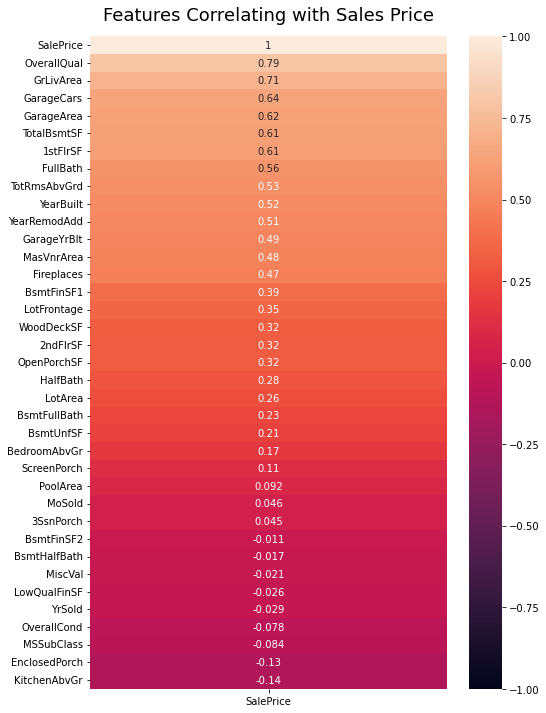

In [130]:
#create a feature correlation plot to show how each feature correlates to our target
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(training_set.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='rocket')

heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [131]:
#create another plot to shosw how each feature is correlated to one another
#highly correlated features can be removed
corr = training_set.corr()
px.imshow(corr,
         template = 'plotly_dark',
         height = 800, width = 800)

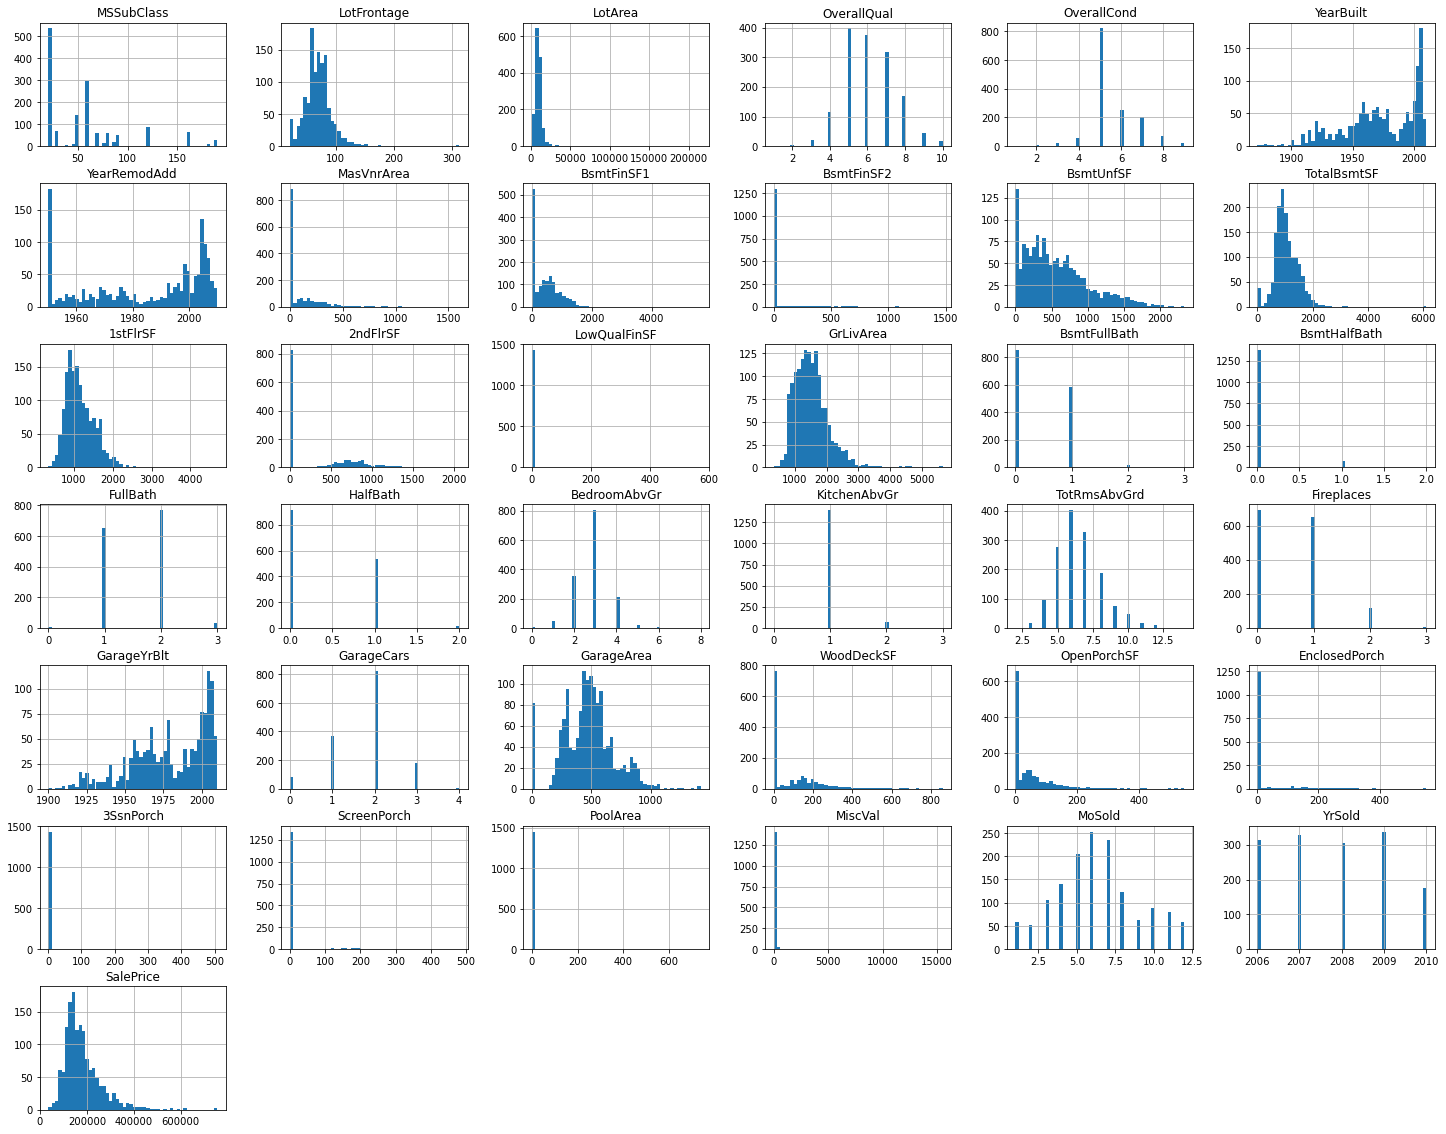

In [132]:
#plot histograms for each feature
_ = training_set.hist(bins = 50, figsize = (25,20))

In [133]:
#create new features
for sets in training_set, testing_set:
    sets['baths_per_sf'] = sets['1stFlrSF'] / (sets['FullBath'] + sets['HalfBath'])
    sets['remodeled'] = sets['BsmtFinSF2'].apply(lambda x: 1 if x != 0 else x)
    sets['has_fireplace'] = sets['Fireplaces'].apply(lambda x: 1 if x != 0 else x)
    sets['has_porch'] = sets['OpenPorchSF'].apply(lambda x: 1 if x != 0 else x)
    sets['has_2nd_story'] = sets['2ndFlrSF'].apply(lambda x: 1 if x != 0 else x)
    sets['has_garage'] = sets['GarageArea'].apply(lambda x: 1 if x != 0 else x)

    #binarize these features in place 
    for col in ['BsmtFinSF2','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']:
        sets[col] = sets[col].apply(lambda x: 1 if x != 0 else x)
        
    #replace inf and na values with 0
    sets.replace([np.inf, -np.inf], 0, inplace=True)
    sets.fillna(0, inplace=True)

In [134]:
processed_path = data_path + "processed/"
#seperate our features and target into X and y 
y = training_set['SalePrice']
training_set.drop(['SalePrice'], axis=1, inplace=True)
X = training_set
#save the processed data
X.to_csv(processed_path + 'X.csv')
np.save(processed_path + 'y.npy',y)
testing_set.to_csv(processed_path + 'testing_set.csv', index = 'Id')